# Anomaly Detection through Clustering Exercises

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle as wr

import itertools
import math
from sklearn import metrics
from random import randint

#DBSCAN import
from sklearn.cluster import DBSCAN

#Scaler import
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#ignore warnings import
import warnings
warnings.filterwarnings("ignore")

In [78]:
def cluster_anomalies(df, cols, scaler):
    
    to_scale = df[cols]
    
    scaler_type = scaler()

    scaled_series = scaler_type.fit_transform(to_scale)
    
    columns = cols
    scaled_columns = ['scaled_' + column for column in columns]
    scaled_df = pd.DataFrame(scaled_series, columns=scaled_columns)
    
    df = pd.concat([df, scaled_df], axis=1)

    dbsc = DBSCAN(eps=.10, min_samples=15)

    dbsc.fit(scaled_series)
    
    df['anomaly_labels'] = dbsc.labels_

    anomalies = df.loc[df['anomaly_labels'] == -1]
    
    print(anomalies.shape)
    
    return df, anomalies

In [79]:
def plot_anomaly_clusters(df, col1, col2):
    
    sns.scatterplot(x= df[col1], y=df[col2], hue=df['anomaly_labels'])
    plt.show()

1. Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.


In [57]:
df = wr.get_groceries()

df

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,435,1,3,29703,12051,16027,13135,182,2204
436,436,1,3,39228,1431,764,4510,93,2346
437,437,2,3,14531,15488,30243,437,14841,1867
438,438,1,3,10290,1981,2232,1038,168,2125


In [3]:
fresh_grocery_frozen = df[['Grocery', 'Fresh', 'Frozen']]

In [4]:
fresh_grocery_frozen

,Grocery,Fresh,Frozen
0,7561,12669,214
1,9568,7057,1762
2,7684,6353,2405
3,4221,13265,6404
4,7198,22615,3915
...,...,...,...
435,16027,29703,13135
436,764,39228,4510
437,30243,14531,437
438,2232,10290,1038


In [5]:
mms = MinMaxScaler()

fresh_grocery_frozen = mms.fit_transform(fresh_grocery_frozen)

fresh_grocery_frozen

array([[0.08146416, 0.11294004, 0.0031063 ],
       [0.10309667, 0.06289903, 0.02854842],
       [0.08278992, 0.05662161, 0.03911643],
       ...,
       [0.32594285, 0.1295431 , 0.00677142],
       [0.02402535, 0.091727  , 0.01664914],
       [0.02702178, 0.02482434, 0.00065742]])

In [6]:
dbsc = DBSCAN(eps=.10, min_samples=15)

dbsc.fit(fresh_grocery_frozen)

DBSCAN(eps=0.1, min_samples=15)

In [7]:
df

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2,3,12669,9656,7561,214,2674,1338
1,1,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,3,1,3,13265,1196,4221,6404,507,1788
4,4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,435,1,3,29703,12051,16027,13135,182,2204
436,436,1,3,39228,1431,764,4510,93,2346
437,437,2,3,14531,15488,30243,437,14841,1867
438,438,1,3,10290,1981,2232,1038,168,2125


In [8]:
columns = ['Grocery', 'Fresh', 'Frozen']
scaled_columns = ['Scaled_' + column for column in columns]

original_df = df.copy()

scaled_df = pd.DataFrame(fresh_grocery_frozen, columns=scaled_columns)

In [9]:
df.shape

(440, 9)

In [10]:
scaled_df.shape

(440, 3)

In [11]:
df = pd.concat([df, scaled_df], axis=1)


In [12]:
df['fgf_labels'] = dbsc.labels_

In [13]:
df.sample(5)

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Grocery,Scaled_Fresh,Scaled_Frozen,fgf_labels
54,54,1,3,27329,1449,1947,2436,204,1333,0.020953,0.243660,0.039626,0
158,158,2,3,2861,6570,9618,930,4004,1682,0.103636,0.025484,0.014874,0
68,68,1,3,2446,7260,3993,5870,788,3095,0.043006,0.021784,0.096065,0
209,209,2,1,5550,12729,16767,864,12420,797,0.180691,0.049461,0.013789,0
350,350,1,3,3521,1099,1997,1796,173,995,0.021492,0.031369,0.029107,0


In [14]:
df['fgf_labels'].value_counts()

 0    420
-1     20
Name: fgf_labels, dtype: int64

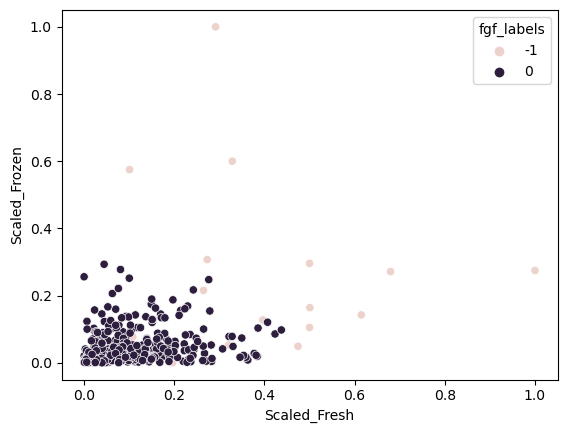

In [15]:
sns.scatterplot(x=df.Scaled_Fresh, y=df.Scaled_Frozen, hue=df.fgf_labels)
plt.show()

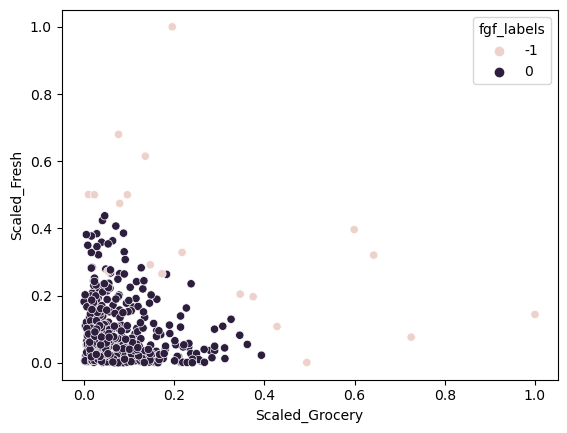

In [16]:
sns.scatterplot(x=df.Scaled_Grocery, y=df.Scaled_Fresh, hue=df.fgf_labels)
plt.show()

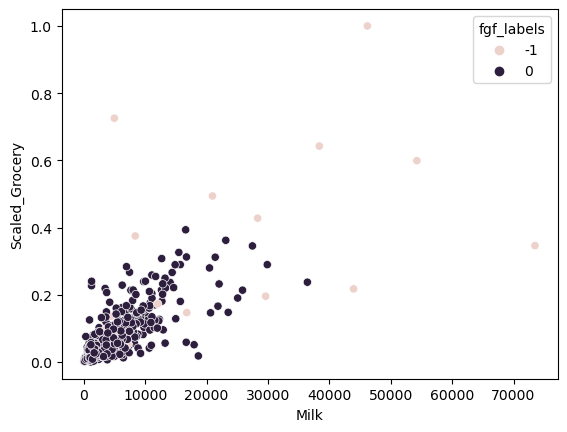

In [17]:
sns.scatterplot(x=df.Milk, y=df.Scaled_Grocery, hue=df.fgf_labels)
plt.show()

In [61]:
df

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,scaled_Grocery,scaled_Fresh,scaled_Frozen,anomaly_labels
0,0,2,3,12669,9656,7561,214,2674,1338,0.081464,0.112940,0.003106,0
1,1,2,3,7057,9810,9568,1762,3293,1776,0.103097,0.062899,0.028548,0
2,2,2,3,6353,8808,7684,2405,3516,7844,0.082790,0.056622,0.039116,0
3,3,1,3,13265,1196,4221,6404,507,1788,0.045464,0.118254,0.104842,0
4,4,2,3,22615,5410,7198,3915,1777,5185,0.077552,0.201626,0.063934,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,435,1,3,29703,12051,16027,13135,182,2204,0.172715,0.264829,0.215469,-1
436,436,1,3,39228,1431,764,4510,93,2346,0.008202,0.349761,0.073713,0
437,437,2,3,14531,15488,30243,437,14841,1867,0.325943,0.129543,0.006771,0
438,438,1,3,10290,1981,2232,1038,168,2125,0.024025,0.091727,0.016649,0


In [19]:
anomalies = df.loc[df['fgf_labels'] == -1]

anomalies.shape

(20, 13)

In [55]:
anomalies.sample(5)

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,anomaly_labels
85,85,2,3,16117,46197,92780,1026,40827,2944,-1
47,47,2,3,44466,54259,55571,7782,24171,6465,-1
145,145,2,3,22039,8384,34792,42,12591,4430,-1
435,435,1,3,29703,12051,16027,13135,182,2204,-1
103,103,1,3,56082,3504,8906,18028,1480,2498,-1


In [58]:
cols = ['Grocery', 'Fresh', 'Frozen']

df, anomalies = cluster_anomalies(df, cols, MinMaxScaler)

In [59]:
df

,customer_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,scaled_Grocery,scaled_Fresh,scaled_Frozen,anomaly_labels
0,0,2,3,12669,9656,7561,214,2674,1338,0.081464,0.112940,0.003106,0
1,1,2,3,7057,9810,9568,1762,3293,1776,0.103097,0.062899,0.028548,0
2,2,2,3,6353,8808,7684,2405,3516,7844,0.082790,0.056622,0.039116,0
3,3,1,3,13265,1196,4221,6404,507,1788,0.045464,0.118254,0.104842,0
4,4,2,3,22615,5410,7198,3915,1777,5185,0.077552,0.201626,0.063934,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,435,1,3,29703,12051,16027,13135,182,2204,0.172715,0.264829,0.215469,-1
436,436,1,3,39228,1431,764,4510,93,2346,0.008202,0.349761,0.073713,0
437,437,2,3,14531,15488,30243,437,14841,1867,0.325943,0.129543,0.006771,0
438,438,1,3,10290,1981,2232,1038,168,2125,0.024025,0.091727,0.016649,0


In [60]:
anomalies.shape

(20, 13)

2. Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.


In [48]:
df = pd.read_csv('curriculum_logs.csv')

df = df.drop(columns='Unnamed: 0')

df.head()

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [ ]:
cols = []

cluster_anomalies(df, cols, MinMaxScaler)

3. Use DBSCAN to detect anomalies in the wine dataset you used in the clustering project.


In [82]:
df = pd.read_csv('wine_quality.csv')

df = df.drop(columns='Unnamed: 0')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [83]:
cols = ['citric acid', 'fixed acidity']

df, anomalies = cluster_anomalies(df, cols, MinMaxScaler)

(11, 16)


In [84]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,scaled_citric acid,scaled_fixed acidity,anomaly_labels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.000000,0.297521,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0.000000,0.330579,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0.024096,0.330579,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0.337349,0.611570,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0.000000,0.297521,0


In [85]:
anomalies

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,scaled_citric acid,scaled_fixed acidity,anomaly_labels
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4,red,0.602410,0.446281,-1
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red,0.265060,0.925620,-1
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red,0.265060,0.925620,-1
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7,red,0.457831,0.975207,-1
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,red,0.295181,0.966942,-1
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,red,0.295181,0.966942,-1
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,red,0.295181,0.975207,-1
652,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,red,0.391566,1.000000,-1
2344,7.4,0.200,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6,white,1.000000,0.297521,-1
2545,8.2,0.345,1.00,18.2,0.047,55.0,205.0,0.99965,2.96,0.43,9.6,5,white,0.602410,0.363636,-1


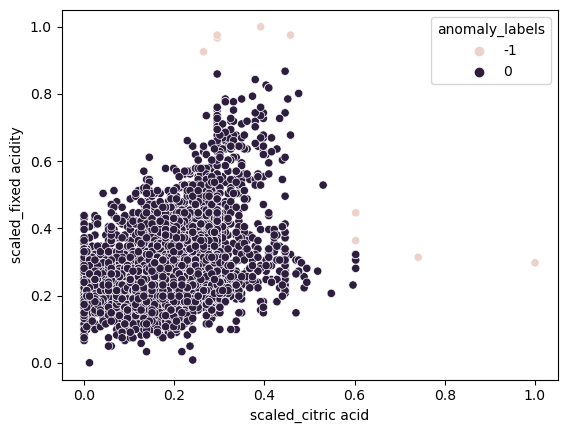

In [86]:
plot_anomaly_clusters(df, 'scaled_citric acid', 'scaled_fixed acidity')